In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from functions import gaussian, euclidean_distance
from network import Network

os.chdir('..')

## Zbiór danych z sześciokątami

In [2]:
hexagon_data = pd.read_csv('data\\hexagon.csv')
x = np.array(hexagon_data.x)
y = np.array(hexagon_data.y)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
hex_xy = np.concatenate((x, y), axis=1)
c = np.array(hexagon_data.c)

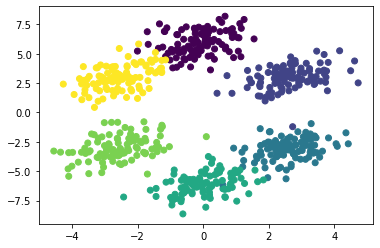

In [3]:
plt.scatter(x, y, c=c)
plt.show()

In [ ]:
KN_hex = Network(input_shape=2, shape=(12, 12))
KN_hex.fit(hex_xy, 300, neighbourhood_scale=1)

In [8]:
def visualise(clusters):
    x = clusters[:, 1]
    y = clusters[:, 2]
    colors = clusters[:, 0]
    neurons = np.zeros(shape=(12, 12))
    for i in range(len(x)):
        neurons[x[i], y[i]] = colors[i]

    plt.imshow(neurons)
    plt.show()

In [8]:
def cluster(kohonen_network, data):
    classes = list(data['c'].unique())
    colnames = copy.deepcopy(classes)
    colnames.append('x')
    colnames.append('y')
    clusters = pd.DataFrame(columns=colnames)

    shape = kohonen_network.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            row = {'x': i, 'y': j}
            for c in classes:
                row[c] = 0
            row = pd.DataFrame(row, index=[0])
            clusters = pd.concat([clusters, row], ignore_index=True, axis=0)
    for i in range(len(data)):
        x = np.array(data.iloc[i, :2])
        x_class = data.loc[i, 'c']
        i_min, j_min = kohonen_network._find_BMU(x)
        clusters.loc[(clusters['x'] == i_min ) & (clusters['y'] == j_min), x_class] += 1
    return clusters

def visualise_2D(clusters):
    n = len(clusters.columns) - 2
    plt.figure(figsize=[12, 12])
    colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']
    for i in range(n):
        plt.scatter(x=clusters.x, y=clusters.y, alpha=0.4, s=100*clusters[i].astype('float'), c=colors[i])
    #plt.legend(np.arange(n))
    plt.show()


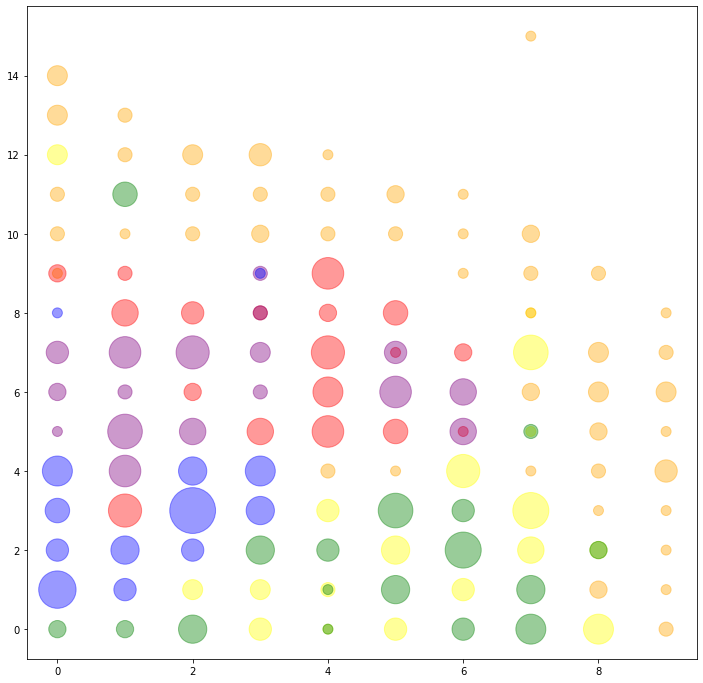

In [9]:
cls = cluster(KN_hex, hexagon_data)
visualise_2D(cls)

In [ ]:
clusters

## 2D data

In [2]:
hexagon_data = pd.read_csv('data\\hexagon.csv')
x = np.array(hexagon_data.x)
y = np.array(hexagon_data.y)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
hex_xy = np.concatenate((x, y), axis=1)
hex_xy.shape

(600, 2)

In [3]:
c = np.array(hexagon_data.c)

In [4]:
KN_hex = Network(input_shape=2, shape=(10, 16))
KN_hex.fit(hex_xy, 200, neighbourhood_scale=1)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

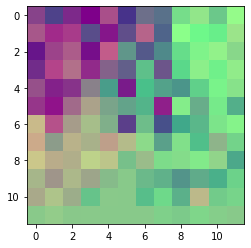

In [5]:
to_plot = np.concatenate((KN2.weights, np.zeros((12, 12, 1)) + 0.5), axis=2)
image = (to_plot - np.min(to_plot)) / (np.max(to_plot) - np.min(to_plot)) * 255
plt.imshow(image.astype('int'))

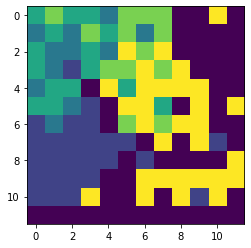

In [9]:
clusters2 = KN2.cluster(hexagon_data)
visualise(clusters2)

In [52]:
cls = cluster(KN2, hexagon_data)

[1, 0, 2, 4, 3, 5]
   x  y  1  0  2  4  3  5
0  0  0  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  1  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  2  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  3  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  4  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  5  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  6  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  7  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  8  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  9  0  0  0  0  0  0
   x   y  1  0  2  4  3  5
0  0  10  0  0  0  0  0  0
   x   y  1  0  2  4  3  5
0  0  11  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  0  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  1  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  2  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  3  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  4  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  5  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  6  0  0  

In [53]:
cls

,1,0,2,4,3,5,x,y
0,0,0,0,0,4,0,0,0
1,0,0,0,7,0,0,0,1
2,0,0,0,0,13,0,0,2
3,0,0,0,0,2,0,0,3
4,0,0,14,0,0,0,0,4
...,...,...,...,...,...,...,...,...
139,0,3,0,0,0,0,11,7
140,0,4,0,0,0,0,11,8
141,0,5,0,0,0,0,11,9
142,0,2,0,0,0,0,11,10


In [4]:
KN = Network(input_shape=2, shape=(20, 20))

In [5]:
KN.fit(hex_xy, 100)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

In [6]:
clusters = KN.cluster(hexagon_data)

In [7]:
clusters

array([[1, 4, 2],
       [0, 1, 2],
       [2, 6, 3],
       ...,
       [4, 1, 7],
       [1, 5, 0],
       [3, 4, 9]], dtype=int64)

In [7]:
to_plot = np.concatenate((KN.weights, np.zeros((20, 20, 1))), axis=2)
image = (to_plot - np.min(to_plot)) / (np.max(to_plot) - np.min(to_plot)) * 255

## 3D data

In [ ]:
cube_data = pd.read_csv('data\\cube.csv')
x = np.array(cube_data.x)
y = np.array(cube_data.y)
z = np.array(cube_data.z)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
z = np.reshape(z, (-1, 1))
cube = np.concatenate((x, y, z), axis=1)